In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import warnings

In [14]:
df = pd.read_csv("Sample_Superstore_2.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order_Date,Ship_Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Creating Dataframe ##

In [15]:
new_df = df[['Order_Date','Sales']]
new_df.head()
new_df.dropna()

,Order_Date,Sales
0,11-08-2016,261.9600
1,11-08-2016,731.9400
2,06-12-2016,14.6200
3,10-11-2015,957.5775
4,10-11-2015,22.3680
...,...,...
9989,1/21/2014,25.2480
9990,2/26/2017,91.9600
9991,2/26/2017,258.5760
9992,2/26/2017,29.6000


In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_Date  9994 non-null   object 
 1   Sales       9994 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [17]:
new_df = df[['Order_Date','Sales']]
new_df.head()

,Order_Date,Sales
0,11-08-2016,261.9600
1,11-08-2016,731.9400
2,06-12-2016,14.6200
3,10-11-2015,957.5775
4,10-11-2015,22.3680


In [18]:
new_df.isnull()

,Order_Date,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9989,False,False
9990,False,False
9991,False,False
9992,False,False


In [19]:
new_df.dropna(inplace=True)
new_df.drop_duplicates(inplace=True)
warnings.filterwarnings("ignore")

In [20]:
new_df.isnull()
new_df.reset_index(drop=True)

,Order_Date,Sales
0,11-08-2016,261.9600
1,11-08-2016,731.9400
2,06-12-2016,14.6200
3,10-11-2015,957.5775
4,10-11-2015,22.3680
...,...,...
9976,1/21/2014,25.2480
9977,2/26/2017,91.9600
9978,2/26/2017,258.5760
9979,2/26/2017,29.6000


In [21]:
new_df['Order_Date'] = pd.to_datetime(new_df['Order_Date'], format='%m-%d-%Y', errors='coerce')
new_df['Order_Date'].fillna(pd.to_datetime(new_df['Order_Date'], format='%m/%d/%Y', errors='coerce'), inplace=True)
new_df.info()
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
Index: 9981 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  4032 non-null   datetime64[ns]
 1   Sales       9981 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 233.9 KB


In [22]:
new_df.set_index('Order_Date',inplace=True)

In [23]:
new_df = new_df.resample('M').sum()
new_df.head()

,Sales
Order_Date,
2014-01-31,4923.616
2014-02-28,3610.402
2014-03-31,8048.773
2014-04-30,16017.851
2014-05-31,9288.864


## Moving Average ##

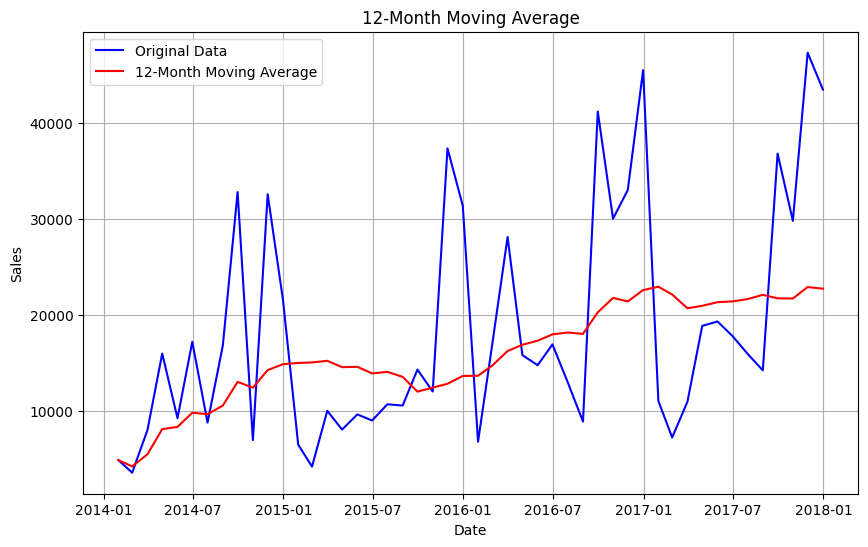

In [24]:
window_size = 12 
moving_avg = new_df['Sales'].rolling(window=window_size, min_periods=1).mean()
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Sales'], label='Original Data', color='blue')
plt.plot(new_df.index, moving_avg, label=f'{window_size}-Month Moving Average', color='red')
plt.title(f'{window_size}-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Trend Analysis ##

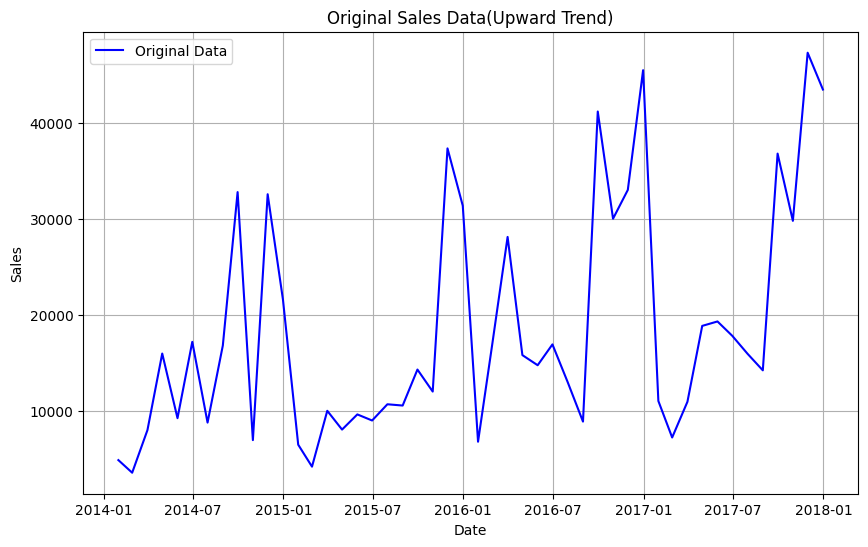

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Sales'], label='Original Data', color='blue')
plt.title('Original Sales Data(Upward Trend)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Exponential Smoothing ##

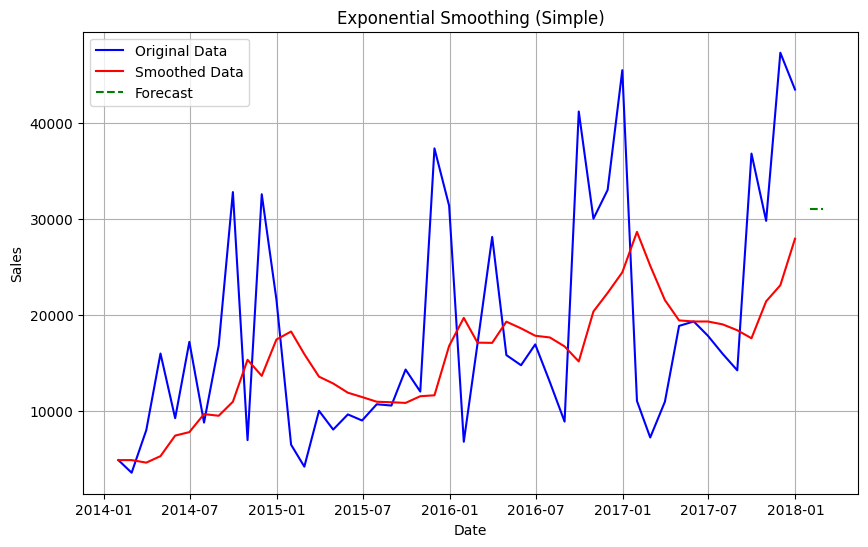

Forecasted values for the next 2 periods:
2018-01-31    31076.561753
2018-02-28    31076.561753
Freq: ME, dtype: float64


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
warnings.filterwarnings("ignore")#remove warings
alpha = 0.2
model = SimpleExpSmoothing(new_df['Sales']).fit(smoothing_level=alpha)
smoothed_series = model.fittedvalues

# Forecast future values
forecast = model.forecast(2)

plt.figure(figsize=(10, 6))
plt.plot(new_df['Sales'], label='Original Data', color='blue')
plt.plot(smoothed_series, label='Smoothed Data', color='red')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title('Exponential Smoothing (Simple)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted values for the next 2 periods:")
print(forecast)

## Auto Regression ##

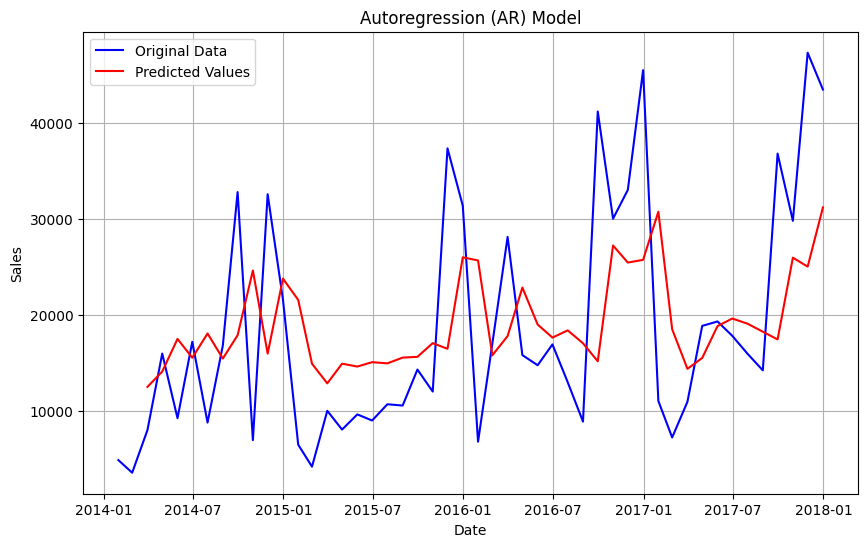

In [27]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse

model_order = 2  
model = AutoReg(new_df, lags=model_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=model_order, end=len(new_df)-1)

# Plot original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(new_df, label='Original Data', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('Autoregression (AR) Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Seasonality ##

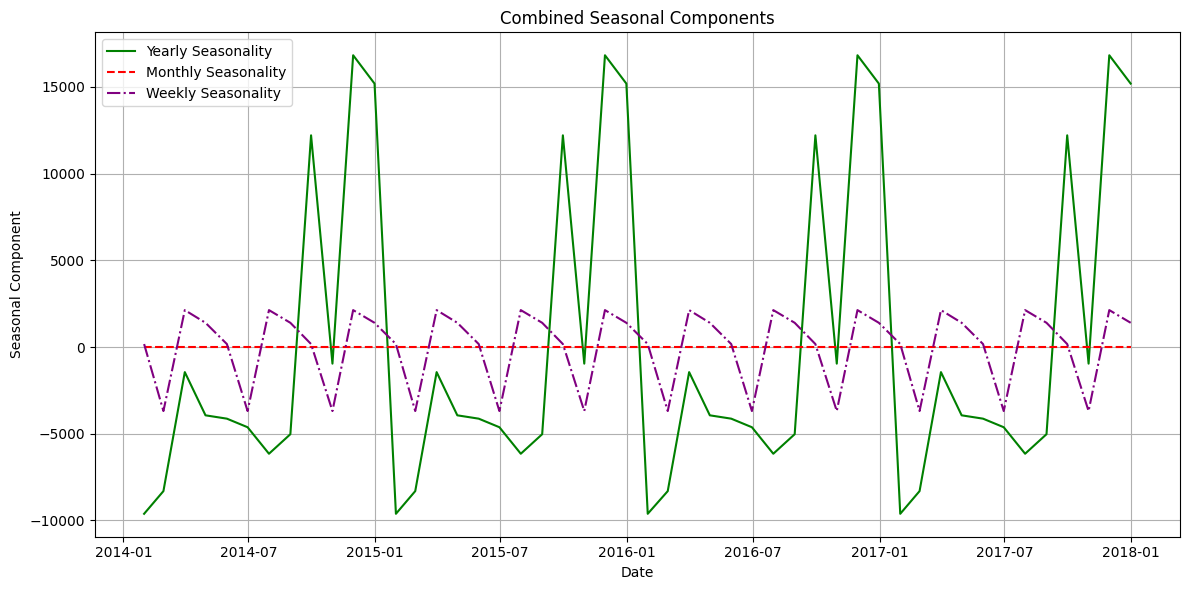

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal decomposition for Yearly seasonality
decomposition_yearly = seasonal_decompose(new_df, model='additive', period=12)

# seasonal decomposition for monthly seasonality
decomposition_monthly = seasonal_decompose(new_df, model='additive', period=1)

# seasonal decomposition for weekly seasonality
decomposition_weekly = seasonal_decompose(new_df, model='additive', period=4)

plt.figure(figsize=(12, 6))
plt.plot(decomposition_yearly.seasonal, label='Yearly Seasonality', color='green', linestyle='-')
plt.plot(decomposition_monthly.seasonal, label='Monthly Seasonality', color='red', linestyle='--')
plt.plot(decomposition_weekly.seasonal, label='Weekly Seasonality', color='purple', linestyle='-.')

plt.title('Combined Seasonal Components')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Cyclic Time Series Data ##

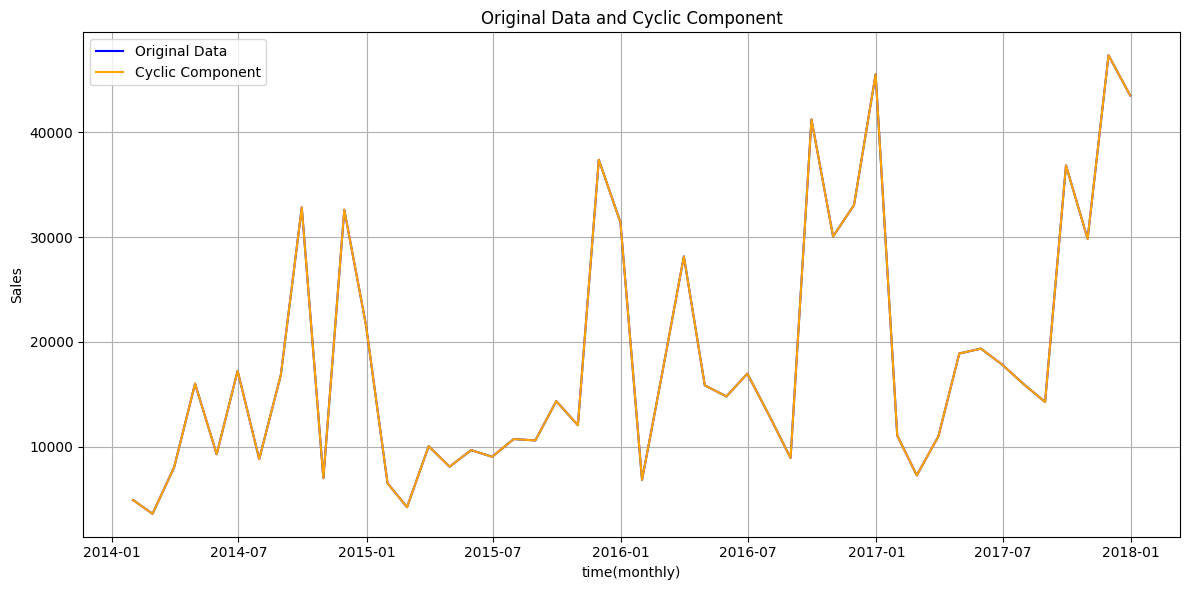

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_cyclic = seasonal_decompose(new_df, model='additive', period=1)  

plt.figure(figsize=(12, 6))

plt.plot(new_df, label='Original Data', color='blue')
plt.plot(decomposition_cyclic.trend, label='Cyclic Component', color='orange')

plt.title('Original Data and Cyclic Component')
plt.xlabel('time(monthly)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Irregularities ##

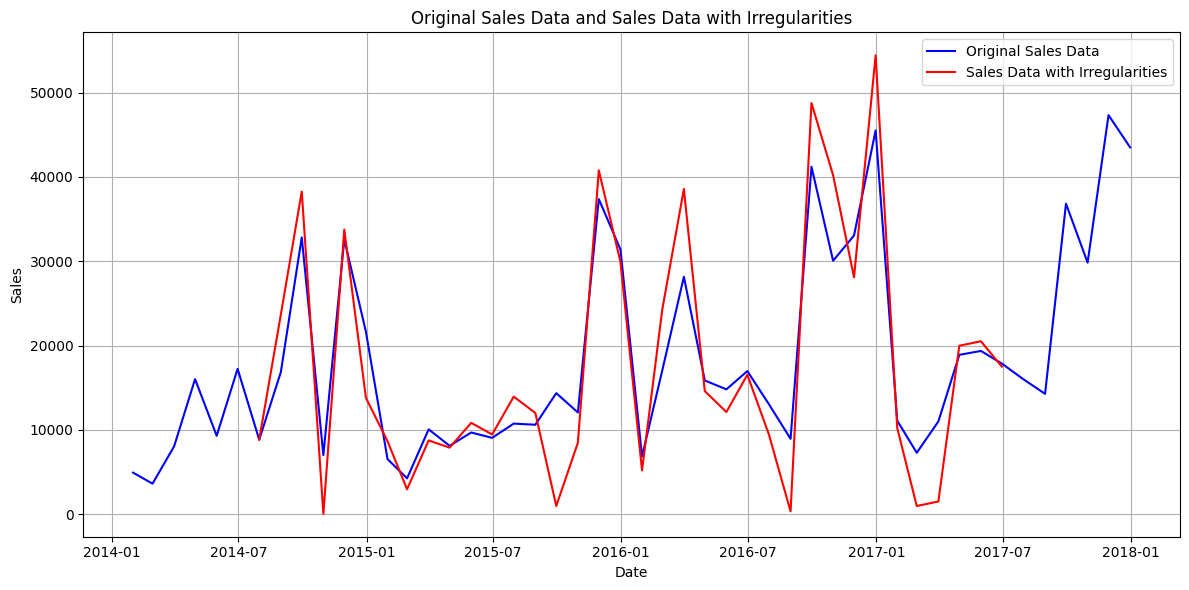

In [30]:
decomposition_sales = seasonal_decompose(new_df, model='additive', period=12)

residuals_aligned = decomposition_sales.resid.reindex(new_df.index)
sales_with_irregularities = new_df['Sales'] + residuals_aligned

plt.figure(figsize=(12, 6))

plt.plot(new_df.index, new_df['Sales'], label='Original Sales Data', color='blue')
plt.plot(new_df.index, sales_with_irregularities, label='Sales Data with Irregularities', color='red')

plt.title('Original Sales Data and Sales Data with Irregularities')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()